$$
\newcommand{\Ex}{\mathbb{E}}
\newcommand{\Var}{\mathrm{Var}}
\newcommand{\Cov}{\mathrm{Cov}}
\newcommand{\SampleAvg}{\frac{1}{N({S})} \sum_{s \in {S}}}
\newcommand{\indic}{\mathbb{1}}
\newcommand{\avg}{\overline}
\newcommand{\est}{\hat}
\newcommand{\trueval}[1]{#1^{*}}
\newcommand{\Gam}[1]{\mathrm{Gamma}#1}
$$

$$
\renewcommand{\like}{\cal L}
\renewcommand{\loglike}{\ell}
\renewcommand{\err}{\cal E}
\renewcommand{\dat}{\cal D}
\renewcommand{\hyp}{\cal H}
\renewcommand{\Ex}[2]{E_{#1}[#2]}
\renewcommand{\x}{\mathbf x}
\renewcommand{\v}[1]{\mathbf #1}
$$

# Introduction

In this notebook we will learn about Markov Chain and its application in Monte Carlo Markov Chain. 

- Markov Chain is a model that describe a sequence of random variable $X_0, X_1, \ldots, X_n, \ldots$. They are all drawn from a distribution, where the value of $X_n$ depends only on the immediate variable $X_{n-1}$. In other words, it lies happily between **complete independence assumption** and **complete  dependence assumption**.

- Monte Carlo Markov Chain is a simulation method (Monte Carlo) that generate samples from a distribution $f(x)$ indirectly using a Markov Chain. In this notebook, we will learn about two pouplar MCMC algorithms: **Metropolis-Hastings algorithm** and **Gibbs sampling**.



# Markov chain (MC)

Markov chain lives in both in space and time. Space here means the domain of $X_t$, and time here means the domain of $t$. Both space and time can be discrete or continuous. We will first focus only on discrete domains. Moreover our discrete space will be finite also. That is $dom(X_t) = \{1,2,\ldots, M\}$

We now define formally Markov chains:

   A sequence of random variables $X_0, X_1, \ldots, X_n, \ldots$ taking values in the state space $\{1,2,\ldots, M\}$ is called a **Markov chain** if for all $n \geq 0$, $$p(X_{n+1} = j \mid X_n = i, X_{n-1} = i_{n-1}, \ldots, X_0 = i_0) = p(X_{n+1} = j \mid X_{n} = i)$$
   
The quantity $p(X_{n+1} = j \mid X_{n} = i)$ is called the transition probability from state i to state j.

**Time-homogenenous** Markov chain has the transition probability $p(X_{n+1} = j \mid X_{n} = i)$ unchanged in time.

**Markov property** is the condition in the defnition. It says that we need only $X_n$ to predict $X_{n+1}$. If n is the presents, before n is the past, after n is the future, Markov property says that given the present the past and the future are conditionally independent.

Knowing the dynamics of a Markov chain means knowing its transition probability from one state to another state. These dynamics is encoded in a matrix, called the transiation matrix, whose (i,j) entry is the probability going from state i to state j in one step of the chain: M-by-M matrix $Q = (q_{ij})$

An example of Markov chain: 

![example](gfx/mchain.png)


**n-step transition probability** from i to j is the probability of being at j exactly n steps after **staring** at i. We denote this by $q_{ij}^{(n)} = p(X_n = j \mid X_0 = i)$.

Note that $q_{ij}^{(2)} = \sum_{k}q_{ik}q_{kj}$

The right hand side is the (ij) entry of $Q^2$. We can say that $Q^2$ is the two-step transition probabilities. By induction, the nth power. In other words, the ith row of $Q^n$ is the conditional PMF of $X_n$ given $X_0 = i$

**mariginal distributions** $p(X_1), \ldots, p(X_n), \ldots$. To compute these distributions, we need $Q$ and the intial distribution of $X_0$. Suppose the marginal distribution $p(X_0) = (t_1, \dots, t_M)$, then the marginal distribution at any time can be computed from the transition matrix, averaging over all the state using LOTP. 

Define $\v{t} = (t_1, \dots, t_M)$ by $t_i = p(X_0 = i)$. Then the marginal distribution of $X_n$ is given by the vector $\v{t}Q^n$, viewing $\v{t}$ as row vector.

# Different charateristics of a Markov chain

We now study a number of characteristics of a Markov chain. They are important in understanding the long-run behaviour of the Markov chain. 

**recurrent** versus **transient**

    State i of a Markov chain is recurrent if starting from i, the probability is 1 that the chain will eventually return to i. Otherwise, the state is transient, which means that if the chain starts from i, there is a positive probability of never returning to i.

Recall that the number of failures, in repeated Bernoulli trials, before the first successful trial follow the Geometric distribution with parameter p: $X \sim Geom(p),$ where $p(X = k) = q^kp$. Note that in ``scipy.stats.geom`` have a slightly different definition, where k counts also the success trial.
![recurrent_transient](gfx/recurrent.jpg)


In [19]:
%matplotlib inline
from scipy.stats import geom
import numpy as np
import matplotlib.pyplot as plt

def mygeom(k, p):
    return (1-p)**k*p

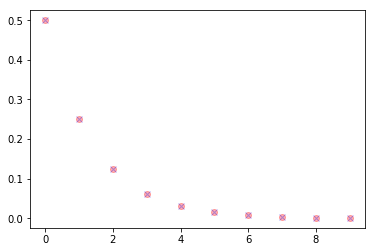

In [33]:
k = np.arange(10) 
plt.plot(k, mygeom(k,1/2), 'o', color='r', alpha=0.3)
plt.plot(k, geom.pmf(k+1, 1/2), 'x', color='b', alpha=0.3)

There is a connection between transient states and geometric distribution: **the number of returns to transient state is Geometric**. Let i be a transient state of a Markov chain. Suppose the probability of never returning to i, starting from i, is a positive number $p >0$. Then, starting from i, the number of times that the chain returns to i before leaving forever is distributed Geom(p)

This means, the chain will eventually leave state i forever. I understand this as probability of the number of times the chain returns before leaving forever approaches 0 as this number increase (See the graph). Hence eventually, the chain leave i forever.


How do we know if a state is recurrent? We cannot analyze the graph of Markov chain visually if there are too many states. **Irreducibility** allows us to do that: if it is possible to get from any state to any other state.

**Irreducible and reducible chain**. 
        
        A Markov chain with transition matrix $Q$ is irreducible if for any two states i and j, it is possible to go from i to j in a finite number of steps (with positive probability). That is, for any states i, j there is some positive integer n such that the (i,j) entry of $Q^n$ is positive. A Markov chain that is not irreducible is called reducible.
  

It is easy to prove irreducibility implies all states are reccurrent.

We have irreducbile implies all recurrent. But the converse is not true. We can have a reducible Markov chain whose states are all recurrent. For example:

![recurrent reducible](gfx/reducible_recurrent.jpg)

**period of a state, periodic and aperiodic chain**

The period of a state i in a Markov chain is the greated common divisor (gcd) of a the possible numbers of steps it can take to return to i when starting at i. In other words, the period of i is the gcd of numbers n such that the (i,i) entry of $Q^n$ is positive.

A state is called **aperiodic** if its period equals 1, and period otherwise. The chain itself is called aperiodic if all its states are aperiodic, and periodic otherwise


![aperiodic](gfx/aperiodic.jpg)

# Stationary distribution

We are interested in the behavior of Markov chain in long run. At first, the chain may spend tim in transient states. Eventually though, the chain will spend all its time in recurrent states. But what fraction of time will it spend in each of the recurrent states? This is answered by the **stationary distribution** of the chain, also known as the **steady-state** distribution.

We will show that for irreducible and aperiodic Markov chains, the stationary distribution describles the long-run behavior of the chain, regardless of its intial conditions.

**Stationary distribution**. A row vector $\v{s} = (s_1, \ldots, s_M)$ such that $s_i \geq 0$ and $\sum_is_i = 1$ is a stationary distribution for a Markov chain with transition matrix Q if $$\sum_is_iq_{ij} = s_j$$ for all j, ore equivalently, $$\v{s}Q = \v{s}$$

From the definition, we can see that if the distribution of intial state $X_0$ is $\v{s}$, then the distribution of $X_1$, $X_2$, etc., all will have distribution $\v{s}$. In other words, if a Markov chain starts with its stationary distribution, it will stay in it forever.

## Existence and uniqueness

For finite state space, a stationary distribution always exists (This is due to Perron-Frobenious theorem)

Any irreducible Markov chain has an unique stationary distribution. In this distribution, every state has positive probability. 

## Convergence

We have the following important theorem without proof.

**Convergence to stationary distribution**.  Let $X_0, X_1, \ldots$ be a Markov chain with stationary distribution $\v{s}$ and transition matrix $Q$, such that some power $Q^m$ is positive in all entries. (These assumptions are equivalent to assuming that the chain is irreducible and aperiodic.) Then $P(X_n = i) \rightarrow s_i$ as $n \rightarrow \infty$. In terms of the transition matrix, $Q^n$ converges to a matrix in which each row is s.
Therefore, after a large number of steps, the probability that the chain is in state i is close to the stationary probability si, regardless of the chain's initial conditions. Intuitively, the extra condition of aperiodicity is needed in order to rule out chains that just go around in circles, such as the chain in the following example.

In [39]:
from numpy.linalg import matrix_power
Q = np.array([[0,1,0,0,0], [0, 0, 1, 0, 0], [0,0,0,1,0], [0,0,0,0,1], [1,0,0,0,0]])
intial = np.array([1,0,0,0,0])
Q

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0]])

In [43]:
for n in range(10,20):
    print('n = ', n) 
    print(np.dot(intial.T, matrix_power(Q,n)))
    print('-'*30)

n =  10
[1 0 0 0 0]
------------------------------
n =  11
[0 1 0 0 0]
------------------------------
n =  12
[0 0 1 0 0]
------------------------------
n =  13
[0 0 0 1 0]
------------------------------
n =  14
[0 0 0 0 1]
------------------------------
n =  15
[1 0 0 0 0]
------------------------------
n =  16
[0 1 0 0 0]
------------------------------
n =  17
[0 0 1 0 0]
------------------------------
n =  18
[0 0 0 1 0]
------------------------------
n =  19
[0 0 0 0 1]
------------------------------


In [44]:
# transition
import numpy as np
transition_matrix = np.array([[1/3, 2/3], [0.5, 0.5]])
transition_matrix

array([[0.33333333, 0.66666667],
       [0.5       , 0.5       ]])

In [45]:
# now for higher n. We should see that it converges to the
# stationary distribution
tm_before = transition_matrix
for i in range(5):
    tm_next = np.dot(tm_before, transition_matrix)
    print(tm_next)
    print("-----------------")
    tm_before = tm_next

[[0.44444444 0.55555556]
 [0.41666667 0.58333333]]
-----------------
[[0.42592593 0.57407407]
 [0.43055556 0.56944444]]
-----------------
[[0.42901235 0.57098765]
 [0.42824074 0.57175926]]
-----------------
[[0.42849794 0.57150206]
 [0.42862654 0.57137346]]
-----------------
[[0.42858368 0.57141632]
 [0.42856224 0.57143776]]
-----------------


We can compute the stationary distribution analytically. Assume that it is  $s = [p,1-p]$. Then $$sT = s$$ give us $$p(1/3) + (1-p)(1/2) = p$$

and thus $p = 3/7$

And we can see that we can get to this stationary distribution starting from multiple places

## Reversibility 

Stationary distribution is important to understand a Markov chain's long-run behavior. 

To find stationary distribution, we need to find eigenvectors of the transition matrix. This involving solving a high-degree polynomial which can be difficult when the number of states (hence the size of Q) is high.

Fortunately, there is an important special cases where working with eginevalue equations for large matrices can be avoided.



**Reversibiliy**. Let $Q = (q_{ij})$ be the transition matrix of a Markov chain. Suppose there is $\v{s} = (s_1, \dots, s_M)$ with $s_i \geq 0$, $\sum_i s_i = 1$, such that $$s_iq_{ij} = s_{j}q_{ji}$$

for all states i and j.

This equation is called the **reversibility** or **detailed balance** condition, and we say that the chain is **reversible** with respect to $\v{s}$ if it holds.

Given a transition matrix, if we can find $s$ whose components sum to $1$ and which satisifies the reversibility condition, then $\v{s}$ is automatically a stationary distribution.

# Markov chain in continous state spaces

In continous state spaces, the transition matrix T becomes an integral kernel K